
# Problem 1 - Hyperparameter Optimization using H20 20 points
In this question, you will compare the performances of H2O’s grid search and randomized grid search. You will use the H2ORandomForestEstimator model, and use the allyears2k headers.zip dataset used in the this link in the classification example.

1. Grid search

(a) Perform grid search for identifying the best hyperparameters for the H2ORandomForestEstimator model with ’ntrees’:[10,30,50,100] and ’max depth’: [1,2,4,6]. (2)

(b) Display the grid results, sorted by accuracy in a decreasing order. (2)

(c) Identify the best model and evaluate the model’s performance on a test set and display the AUC score.

In [ ]:
! pip install h2o


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(nthreads = -1, max_mem_size = 8)
h2o.connect()

airlines= h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/airlines/allyears2k_headers.zip")

# set the factors:
airlines["Year"]= airlines["Year"].asfactor()
airlines["Month"]= airlines["Month"].asfactor()
airlines["DayOfWeek"] = airlines["DayOfWeek"].asfactor()
airlines["Cancelled"] = airlines["Cancelled"].asfactor()
airlines['FlightNum'] = airlines['FlightNum'].asfactor()

# set the predictors and response columns:
predictors = ["Origin", "Dest", "Year", "UniqueCarrier",
              "DayOfWeek", "Month", "Distance", "FlightNum"]
response = "IsDepDelayed"


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpcaj141z_
  JVM stdout: /tmp/tmpcaj141z_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpcaj141z_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_9xh3av
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Connecting to H2O server at http://localhost:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_9xh3av
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
train, valid = airlines.split_frame(ratios = [.8], seed = 1234)


In [ ]:

from h2o.estimators import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

hyper_parameters = { 'ntrees':[10,30,50,100], 
                     'max_depth': [1,2,4,6] }

model_grid_search = H2OGridSearch(H2ORandomForestEstimator( nfolds=5),
      hyper_parameters, 
      grid_id="random_plus_manual")
    
model_grid_search.train(x=predictors,y=response, training_frame=train,validation_frame = valid)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,max_depth,ntrees,model_ids,logloss
,6.0,100.0,random_plus_manual_model_16,0.6074097
,6.0,30.0,random_plus_manual_model_8,0.6080527
,6.0,50.0,random_plus_manual_model_12,0.6084735
,6.0,10.0,random_plus_manual_model_4,0.6113018
,4.0,50.0,random_plus_manual_model_11,0.6246213
,4.0,30.0,random_plus_manual_model_7,0.6250392
,4.0,100.0,random_plus_manual_model_15,0.6253382
,4.0,10.0,random_plus_manual_model_3,0.6254629
,2.0,100.0,random_plus_manual_model_14,0.6497448
,2.0,50.0,random_plus_manual_model_10,0.6497561


In [ ]:
Rand_forest_model = model_grid_search.get_grid(sort_by='auc', decreasing=True)
Rand_forest_model

,max_depth,ntrees,model_ids,auc
,6.0,100.0,random_plus_manual_model_16,0.7356001
,6.0,50.0,random_plus_manual_model_12,0.7344319
,6.0,30.0,random_plus_manual_model_8,0.7330098
,6.0,10.0,random_plus_manual_model_4,0.7290180
,4.0,100.0,random_plus_manual_model_15,0.7199165
,4.0,30.0,random_plus_manual_model_7,0.7178729
,4.0,50.0,random_plus_manual_model_11,0.7172048
,4.0,10.0,random_plus_manual_model_3,0.7165073
,2.0,50.0,random_plus_manual_model_10,0.6919059
,2.0,100.0,random_plus_manual_model_14,0.6904609


In [ ]:
best_model = Rand_forest_model.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_model_perf1 = best_model.model_performance(valid)

best_model_perf1.auc()

0.7341018483113351


2. Randomized grid search

(a) Using the same model and hyperparameters grid, perform hyperparameter optimization using randomized grid search. Use a maximum of 10 models. (2)

(b) Display the results sorted by accuracy in a decreasing order. (2)

(c) Identify the best model and evaluate the model’s performance on a test set and display the auc score. (2)

In [ ]:
search_criteria = { 'strategy': "RandomDiscrete", 'seed': 42,
                    'stopping_tolerance': 0.001,
                    'max_models': 10,
                   'max_runtime_secs': 120}
model_rand_search = H2OGridSearch(H2ORandomForestEstimator( nfolds=5),
      hyper_parameters, 
      grid_id="random_plus_manual",
      search_criteria=search_criteria)

model_rand_search.train(x=predictors,y=response, training_frame=train)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,max_depth,ntrees,model_ids,logloss
,6.0,100.0,random_plus_manual_model_16,0.6074097
,6.0,30.0,random_plus_manual_model_8,0.6080527
,6.0,100.0,random_plus_manual_model_22,0.6082100
,6.0,50.0,random_plus_manual_model_12,0.6084735
,6.0,30.0,random_plus_manual_model_20,0.6085294
,6.0,50.0,random_plus_manual_model_28,0.6087198
,6.0,10.0,random_plus_manual_model_4,0.6113018
,6.0,10.0,random_plus_manual_model_23,0.6114164
,4.0,30.0,random_plus_manual_model_26,0.6244080
,4.0,50.0,random_plus_manual_model_11,0.6246213


In [ ]:
Rand_forest_model_rand = model_rand_search.get_grid(sort_by='auc', decreasing=True)
Rand_forest_model_rand

,max_depth,ntrees,model_ids,auc
,6.0,100.0,random_plus_manual_model_16,0.7356001
,6.0,100.0,random_plus_manual_model_22,0.7345767
,6.0,50.0,random_plus_manual_model_12,0.7344319
,6.0,50.0,random_plus_manual_model_28,0.7336739
,6.0,30.0,random_plus_manual_model_20,0.7332505
,6.0,30.0,random_plus_manual_model_8,0.7330098
,6.0,10.0,random_plus_manual_model_4,0.7290180
,6.0,10.0,random_plus_manual_model_23,0.7283533
,4.0,100.0,random_plus_manual_model_15,0.7199165
,4.0,30.0,random_plus_manual_model_26,0.7187054


In [ ]:
best_model = Rand_forest_model_rand.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_model_perf1 = best_model.model_performance(valid)

best_model_perf1.auc()

0.7341018483113351

3. H2O AutoML

(a) Now using H20’s AutoML find the best deep learning model for the same classification task. Use H2OAutoML and test a maximum of 20 models to find the best performing model. (2)



In [ ]:
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=predictors, y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20221210_223053

No summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.1717606700684451
RMSE: 0.41444018877088296
LogLoss: 0.5168880107499636
AUC: 0.8290670184280022
AUCPR: 0.848251322307539
Gini: 0.6581340368560045
Null degrees of freedom: 10067
Residual degrees of freedom: 10056
Null deviance: 13925.936362522776
Residual deviance: 10408.056984461267
AIC: 10432.056984461267

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43005511039851657
       NO    YES    Error    Rate
-----  ----  -----  -------  ----------------
NO     2914  1837   0.3867   (1837.0/4751.0)
YES    807   4510   0.1518   (807.0/5317.0)
Total  3721  6347   0.2626   (2644.0/10068.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.430055     0.77332   247
max f2                       0.234376     0.866153  335
max f0point5                 0.604871     0.775882  164
max accuracy                 0.51006      0.747219  210
max precision                0.994813     1         0
max recall                   0.0760402    1         396
max specificity              0.994813     1         0
max absolute_mcc             0.51006      0.49333   210
max min_per_class_accuracy   0.514415     0.745738  208
max mean_per_class_accuracy  0.51006      0.746849  210
max tns                      0.994813     4751      0
max fns                      0.994813     5300      0
max fps                      0.0562889    4751      399
max tps                      0.0760402    5317      396
max tnr                      0.994813     1         0
max fnr                      0.994813     0.996803  0
max fpr                      0.0562889    1         399
max tpr                      0.0760402    1         396

Gains/Lift Table: Avg response rate: 52.81 %, avg score: 52.77 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101311                   0.962683           1.89355   1.89355            1                0.98157   1                           0.98157             0.0191838       0.0191838                  89.3549   89.3549            0.0191838
2        0.0200636                   0.940416           1.87461   1.88417            0.99             0.951299  0.99505                     0.966585            0.0186195       0.0378033                  87.4614   88.4175            0.0375928
3        0.030294                    0.923464           1.87517   1.88113            0.990291         0.932255  0.993443                    0.954991            0.0191838       0.056987                   87.5165   88.1132            0.0565661
4        0.0400278                   0.91182            1.85491   1.87475            0.979592         0.918097  0.990074                    0.946019            0.0180553       0.0750423                  85.4905   87.4754            0.0742004
5        0.0500596                   0.899437           1.85605   1.87101            0.980198         0.90581   0.988095                    0.937961            0.0186195       0.0936618                  85.6053   87.1007            0.0923989
6        0.10002                     0.840859           1.78061   1.82586            0.940358         0.870118  0.96425                     0.904073            0.0889599       0.182622                   


(b) Display the leaderboard, and identify the best performing model using it and print its parameters. (2)


In [9]:
lb = aml.leaderboard
lb.head(rows=lb.nrows) 

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20221210_223053,0.756622,0.585017,0.770112,0.356065,0.447445,0.200207
StackedEnsemble_BestOfFamily_1_AutoML_1_20221210_223053,0.756361,0.58524,0.769764,0.337142,0.447542,0.200294
GBM_1_AutoML_1_20221210_223053,0.751977,0.589743,0.76388,0.354627,0.449517,0.202066
XGBoost_grid_1_AutoML_1_20221210_223053_model_2,0.750821,0.589996,0.765224,0.331983,0.449842,0.202358
GBM_2_AutoML_1_20221210_223053,0.75009,0.591395,0.759712,0.354386,0.450217,0.202696
GBM_3_AutoML_1_20221210_223053,0.748914,0.592695,0.75858,0.354532,0.450756,0.203181
GBM_4_AutoML_1_20221210_223053,0.747819,0.594896,0.758901,0.345343,0.451803,0.204126
DeepLearning_grid_1_AutoML_1_20221210_223053_model_1,0.746329,0.601509,0.760493,0.358577,0.453485,0.205649
GBM_5_AutoML_1_20221210_223053,0.745466,0.595303,0.754611,0.36843,0.452081,0.204378
GBM_grid_1_AutoML_1_20221210_223053_model_1,0.744993,0.596193,0.753897,0.355011,0.452405,0.20467


(c) Display the AUC score of the best model for the test set. (2)



In [10]:
aml.leader
preds = aml.leader.predict(valid)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [11]:
preds

predict,NO,YES
YES,0.276975,0.723025
YES,0.276975,0.723025
YES,0.261948,0.738052
YES,0.302014,0.697986
YES,0.312419,0.687581
YES,0.303859,0.696141
YES,0.252528,0.747472
YES,0.261948,0.738052
YES,0.303859,0.696141
YES,0.311557,0.688443


(d) Identify the best XGBoost model among all the models tested ranked by log loss as the criteria. (2)


In [12]:
xgb = aml.get_best_model(algorithm="xgboost", criterion="logloss")
xgb

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20221210_223053_model_2


Model Summary: 
    number_of_trees
--  -----------------
    49

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.1863920955244808
RMSE: 0.4317315086074687
LogLoss: 0.5525219214938155
Mean Per-Class Error: 0.30960708636897366
AUC: 0.7936144710605667
AUCPR: 0.8071367850319533
Gini: 0.5872289421211334

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3896628941098849
       NO     YES    Error    Rate
-----  -----  -----  -------  -----------------
NO     8591   8175   0.4876   (8175.0/16766.0)
YES    2433   16052  0.1316   (2433.0/18485.0)
Total  11024  24227  0.3009   (10608.0/35251.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.389663     0.751639  268
max f2                       0.216925     0.855295  350
max f0point5                 0.593071     0.741193  171
max accuracy                 0.485942     0.720632  224
max precision                0.983632     1         0
max recall                   0.0863908    1         396
max specificity              0.983632     1         0
max absolute_mcc             0.4926       0.439163  221
max min_per_class_accuracy   0.514905     0.718204  209
max mean_per_class_accuracy  0.512129     0.719223  211
max tns                      0.983632     16766     0
max fns                      0.983632     18473     0
max fps                      0.0654377    16766     399
max tps                      0.0863908    18485     396
max tnr                      0.983632     1         0
max fnr                      0.983632     0.999351  0
max fpr                      0.0654377    1         399
max tpr                      0.0863908    1         396

Gains/Lift Table: Avg response rate: 52.44 %, avg score: 52.41 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100706                   0.937395           1.86403   1.86403            0.977465         0.956893  0.977465                    0.956893            0.018772        0.018772                   86.4031   86.4031            0.0182948
2        0.0200278                   0.921695           1.84181   1.85298            0.965812         0.929259  0.971671                    0.943154            0.0183392       0.0371112                  84.1809   85.2983            0.0359183
3        0.0300133                   0.909299           1.82574   1.84392            0.957386         0.914609  0.966919                    0.933657            0.018231        0.0553422                  82.5741   84.3919            0.0532546
4        0.0402542                   0.895879           1.80135   1.83309            0.944598         0.902889  0.96124                     0.92583             0.0184474       0.0737896                  80.1354   83.3091            0.0705091
5        0.0500411                   0.884878           1.73565   1.81403            0.910145         0.88969   0.951247                    0.918761            0.0169867       0.0907763                  73.5652   81.4034            0.0856469
6        0.100054                    0.823838           1.72853   1.77129            0.90641          0.853715  0.928835                    0.886248            0.0864485       0.177225                   72.8528   77.1293            0.162254
7        0.150038                    0.779915           1.58989   

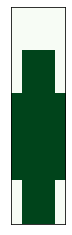

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the dimensions of the tree
width = 0.25
height = 1

# Create the tree as a NumPy array with zeros
tree = np.zeros((5,5))

# Set the values for the tree
tree[1,1:4] = 1
tree[2,0:5] = 1
tree[3,0:5] = 1
tree[4,1:4] = 1

# Create a figure and axis
fig, ax = plt.subplots()

# Create a grid of squares with the tree values
im = ax.imshow(tree, cmap='Greens', interpolation='none', extent=[-width/2, width/2, -height/2, height/2])

# Remove the axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()

In [2]:
import numpy as np

# Set the dimensions of the tree
width = 5
height = 5

# Create the tree as a NumPy array with spaces
tree = np.array([[' ' for _ in range(width)] for _ in range(height)])

# Set the values for the tree
tree[1,1:4] = 'X'
tree[2,0:5] = 'X'
tree[3,0:5] = 'X'
tree[4,1:4] = 'X'

# Print the tree
for row in tree:
    print(' '.join(row))
    

         
  X X X  
X X X X X
X X X X X
  X X X  


In [3]:
# Print the top of the tree
print("   *")

# Print the middle of the tree
print("  ***")
print(" *****")

# Print the bottom of the tree
print("   *")
print("   *")

   *
  ***
 *****
   *
   *


In [4]:
# Set the height of the tree
height = 5

# Print the top of the tree
print(" " * (height - 1) + "*")

# Print the middle of the tree
for i in range(1, height):
    print(" " * (height - i - 1) + "*" * (2 * i + 1))

# Print the bottom of the tree
print(" " * (height - 1) + "*")
print(" " * (height - 1) + "*")


    *
   ***
  *****
 *******
*********
    *
    *


In [5]:
height = 7

# Print the top of the tree
print(" " * (height - 1) + "T")

# Print the trunk of the tree
print(" " * (height - 1) + "|")

# Print the leaves of the tree
for i in range(1, height):
    print(" " * (height - i - 1) + "A" * (2 * i + 1))
    

      T
      |
     AAA
    AAAAA
   AAAAAAA
  AAAAAAAAA
 AAAAAAAAAAA
AAAAAAAAAAAAA


In [6]:
height = 7

# Print the top of the tree
print(" " * (height - 1) + "T")

# Print the trunk of the tree
print(" " * (height - 1) + "|")

# Print the leaves of the tree
for i in range(1, height):
    print(" " * (height - i - 1) + "#" * (2 * i + 1))

      T
      |
     ###
    #####
   #######
  #########
 ###########
#############
